## Relação da duração e valor de eventos pagos

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [189]:
df = pd.read_csv('mapa.csv')
df.dropna(inplace=True)
df = df[(df['price'] != 0) & (df['duration'] <= 50) & (df['duration'] != 0)]
df.reset_index(drop=True, inplace=True)

df

,price,duration,frequency
0,10,3.000000,daily
1,2,19.000000,once
2,5,2.000000,once
3,10,0.666667,weekly
4,85,9.000000,weekly
...,...,...,...
498,10,2.000000,once
499,15,2.000000,once
500,10,2.500000,once
501,15,2.000000,once


### Regressão Linear

In [190]:
x = df[['duration']].values
y = df['price']

In [191]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [192]:
reg.coef_, reg.intercept_

(array([3.41981129]), 17.557114922309744)

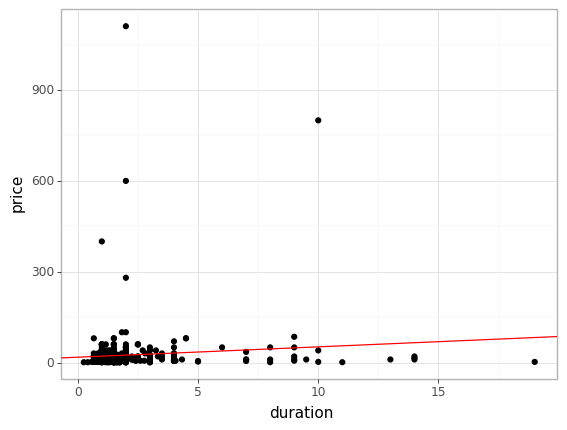

<ggplot: (8769049330460)>

In [193]:
(ggplot(df,aes('duration', 'price'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=reg.intercept_, slope=reg.coef_[0], color='red')
)

In [194]:
reg.predict([[4]])

array([31.23636007])

### SGD Regressor

In [195]:
reg2 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg2.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [196]:
reg2.predict([[2], [4], [8]])

array([24.55213847, 32.15253636, 47.35333215])

### Regressão Polinomial

In [197]:
x = df['duration']
y = df['price']

In [198]:
z = np.polyfit(x, y, 4)
z

array([-8.17287242e-04, -1.12726224e-02,  1.20059596e-01,  5.71761877e+00,
        1.35784623e+01])

In [199]:
p2 = np.poly1d(z)

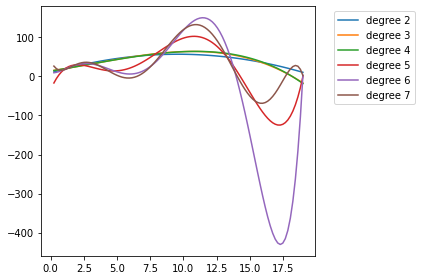

In [200]:
xp = np.linspace(x.min(), x.max(), 100)
for i in range(2, 8):
    pn = np.poly1d(np.polyfit(x, y, i))
    _ = plt.plot(xp, pn(xp), '-', label=f"degree {i}")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Métricas de avaliação de desempenho

Foi escolhido o **R² (Coeficiente de determinação)** para verificar se o modelo encontrado explica os dados de uma forma melhor que a média.

In [227]:
X = df[['duration']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [228]:
print("Treinamento, Teste")
print(f"X: {X_train.shape}, {X_test.shape}")
print(f"Y: {y_train.shape}, {y_test.shape}")

Treinamento, Teste
X: (337, 1), (166, 1)
Y: (337, 1), (166, 1)


### Avaliando Regressão Linear

In [240]:
reg.fit(X_train, y_train)

LinearRegression()

In [241]:
y_pred = reg.predict(X_test)
y_pred.shape

(166, 1)

In [242]:
print(r2_score(y_test, y_pred))

-0.0554025760041843


### Avaliando SGD Regressor

In [243]:
reg2.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [248]:
y_pred = reg2.predict(X_test)
y_pred.shape

(166,)

In [253]:
print(r2_score(y_test, y_pred))

-0.049544941519072294


### Avaliando Regressão Polinomial

In [256]:
for count, degree in enumerate([3, 4, 5, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(0))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test, y_pred))

-0.16102267513506674
-0.16104496276615277
-0.30320938082116067
-0.5173309921281459
-0.6794296349007092
